# Fin 591 : Neural Network Exercises

This is an exercise to improve your understanding of Neural Networks.

# Problem 1 : AND Perceptron

### What are the weights and bias for the AND perceptron?

Set the weights (weight1, weight2) and bias (bias) to values that will correctly determine the AND operation as shown below.

![](andgate.jpg)

More than one set of values will work!

In [23]:
import pandas as pd

# TODO: Set weight1, weight2, and bias
weight1 = 1
weight2 = 1
bias = -1.5


# DON'T CHANGE ANYTHING BELOW
# Inputs and outputs
test_inputs = [(0, 0), (0, 1), (1, 0), (1, 1)]
correct_outputs = [False, False, False, True]
outputs = []

# Generate and check output
for test_input, correct_output in zip(test_inputs, correct_outputs):
    linear_combination = weight1 * test_input[0] + weight2 * test_input[1] + bias
    output = int(linear_combination >= 0)
    is_correct_string = 'Yes' if output == correct_output else 'No'
    outputs.append([test_input[0], test_input[1], linear_combination, output, is_correct_string])

# Print output
num_wrong = len([output[4] for output in outputs if output[4] == 'No'])
output_frame = pd.DataFrame(outputs, columns=['Input 1', '  Input 2', '  Linear Combination', '  Activation Output', '  Is Correct'])
if not num_wrong:
    print('Nice!  You got it all correct.\n')
else:
    print('You got {} wrong.  Keep trying!\n'.format(num_wrong))
print(output_frame.to_string(index=False))

Nice!  You got it all correct.

 Input 1    Input 2    Linear Combination    Activation Output   Is Correct
       0          0                  -1.5                    0          Yes
       0          1                  -0.5                    0          Yes
       1          0                  -0.5                    0          Yes
       1          1                   0.5                    1          Yes


# Problem 2 : NOT Perceptron

### What are the weights and bias for the NOT perceptron?

Unlike the other perceptrons we looked at, the NOT operation only cares about one input. The operation returns a 0 if the input is 1 and a 1 if it's a 0. The other inputs to the perceptron are ignored.

In this question you'll set the weights (weight1, weight2) and bias to the values that calculate the NOT operation on the second input and ignores the first input.

![](notgate.jpg)

In [59]:
import pandas as pd

# TODO: Set weight1, weight2, and bias
weight1 = 0
weight2 = -1
bias = 0


# DON'T CHANGE ANYTHING BELOW
# Inputs and outputs
test_inputs = [(0, 0), (0, 1), (1, 0), (1, 1)]
correct_outputs = [True, False, True, False]
outputs = []

# Generate and check output
for test_input, correct_output in zip(test_inputs, correct_outputs):
    linear_combination = weight1 * test_input[0] + weight2 * test_input[1] + bias
    output = int(linear_combination >= 0)
    is_correct_string = 'Yes' if output == correct_output else 'No'
    outputs.append([test_input[0], test_input[1], linear_combination, output, is_correct_string])

# Print output
num_wrong = len([output[4] for output in outputs if output[4] == 'No'])
output_frame = pd.DataFrame(outputs, columns=['Input 1', '  Input 2', '  Linear Combination', '  Activation Output', '  Is Correct'])
if not num_wrong:
    print('Nice!  You got it all correct.\n')
else:
    print('You got {} wrong.  Keep trying!\n'.format(num_wrong))
print(output_frame.to_string(index=False))

Nice!  You got it all correct.

 Input 1    Input 2    Linear Combination    Activation Output   Is Correct
       0          0                     0                    1          Yes
       0          1                    -1                    0          Yes
       1          0                     0                    1          Yes
       1          1                    -1                    0          Yes


# Problem 3: Implementing the softmax function
![](softmax.jpg)
###   $\color{red}{\text{ Implement your own softmax function. Complete the code softmaxown below.}}$ 
#### The input scores = np.array([3.0, 1.0, 0.2]) should produce an output [0.8360188  0.11314284 0.05083836] if you implemented the function correctly.

In [60]:
# The input scores = np.array([3.0, 1.0, 0.2]) should produce an 
# output [0.8360188  0.11314284 0.05083836] if you implemented the function correctly.

import numpy as np

def softmaxown(x):
    """Compute softmax values for each sets of scores in x."""
    e_x = np.exp(x - np.max(x))
# replace none with your code
    return e_x / e_x.sum()

scores = np.array([3.0, 1.0, 0.2])
print(softmaxown(scores))

[0.8360188  0.11314284 0.05083836]


#### Now import the softmax function from sklearn. Verify you get the same answer with your function and sklearn's function

In [61]:
# Note: The array y passed to your function softmaxown is the same as array x which is passed to softmax.
# Except, softmax expects a 2D array, hence the double square brackets
# output should match
#array([[ 0.3340521 ,  0.33048906,  0.33545884]]) 

# first your function 
y = np.array([ 0.50839931,  0.49767588,  0.51260159])
print(softmaxown(y))

# next sklearn

from sklearn.utils.extmath import softmax
x = np.array([[ 0.50839931,  0.49767588,  0.51260159]])
print(softmax(x))

[0.3340521  0.33048906 0.33545884]
[[0.3340521  0.33048906 0.33545884]]


# Problem 4: Implementing the cross entropy function
![](crossentropy.jpg)

### $\color{red}{\text{Implement your own cross entropy function. Complete the code cross_entropy below.}}$ 

In [62]:
# Write a function that takes as input two lists Y, P,
# and returns the float corresponding to their cross-entropy.
# Y is for the category, and P is the probability.

import numpy as np

def cross_entropy(Y, P):
    # code here
    
    return -np.sum(Y * np.log(P) + (1 - Y) * np.log(1 - P))

Y=np.array([1,0,1,1])
P=np.array([0.4,0.6,0.1,0.5])

# your code should return 4.8283137373
print(cross_entropy(Y, P))

4.828313737302301


# Problem 5: Implementing the Gradient Descent Algorithm

In this lab, we'll implement the basic functions of the Gradient Descent algorithm to find the boundary in a small dataset. First, we'll start with some functions that will help us plot and visualize the data.

In [63]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#Some helper functions for plotting and drawing lines

def plot_points(X, y):
    admitted = X[np.argwhere(y==1)]
    rejected = X[np.argwhere(y==0)]
    plt.scatter([s[0][0] for s in rejected], [s[0][1] for s in rejected], s = 25, color = 'blue', edgecolor = 'k')
    plt.scatter([s[0][0] for s in admitted], [s[0][1] for s in admitted], s = 25, color = 'red', edgecolor = 'k')

def display(m, b, color='g--'):
    plt.xlim(-0.05,1.05)
    plt.ylim(-0.05,1.05)
    x = np.arange(-10, 10, 0.1)
    plt.plot(x, m*x+b, color)

## Reading and plotting the data

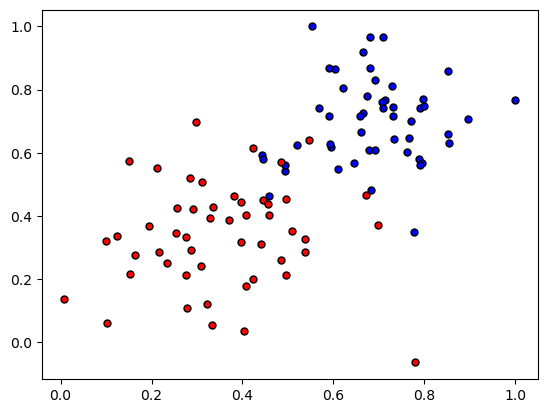

In [64]:
data = pd.read_csv('gradientdescentdata.csv', header=None)
X = np.array(data[[0,1]])
y = np.array(data[2])
plot_points(X,y)
plt.show()

## $\color{red}{\text{TODO: Implementing the basic functions}}$ 
Implement the following formulas, as explained in the class.
- Sigmoid activation function

$$\sigma(x) = \frac{1}{1+e^{-x}}$$

- Output (prediction) formula

$$\hat{y} = \sigma(w_1 x_1 + w_2 x_2 + b)$$

- Error function

$$Error(y, \hat{y}) = - y \log(\hat{y}) - (1-y) \log(1-\hat{y})$$

- The function that updates the weights

$$ w_i \longrightarrow w_i + \alpha (y - \hat{y}) x_i$$

$$ b \longrightarrow b + \alpha (y - \hat{y})$$

In [72]:
# Implement the following functions
# replace none with code.  For the last function you will need additional steps

# Activation (sigmoid) function
def sigmoid(x):
    return 1/(1+np.exp(-x))

# Output (prediction) formula
def output_formula(features, weights, bias):
    return sigmoid(np.dot(features, weights) + bias)
    #return sigmoid(features*weights+bias)

# Error (log-loss) formula
def error_formula(y, output):
    return np.dot(-y, np.log(output)) - np.dot((1-y), np.log(1-output))
    # return -y*np.log(output)-(1-y)*np.log(1-output)
#-np.sum(Y * np.log(P) + (1 - Y) * np.log(1 - P))

# Gradient descent step
def update_weights(x, y, weights, bias, learnrate):
    # code here, need additional steps
    output = output_formula(x, weights, bias)
    weights += np.dot(learnrate, np.dot((y - output),x))
    bias += learnrate*(y- output)
    return weights, bias


## Training function
This function will help us iterate the gradient descent algorithm through all the data, for a number of epochs. It will also plot the data, and some of the boundary lines obtained as we run the algorithm.

In [73]:
np.random.seed(44)

epochs = 100
learnrate = 0.01

def train(features, targets, epochs, learnrate, graph_lines=False):
    
    errors = []
    n_records, n_features = features.shape
    last_loss = None
    weights = np.random.normal(scale=1 / n_features**.5, size=n_features)
    bias = 0
    for e in range(epochs):
        del_w = np.zeros(weights.shape)
        for x, y in zip(features, targets):
            output = output_formula(x, weights, bias)
            error = error_formula(y, output)
            weights, bias = update_weights(x, y, weights, bias, learnrate)
        
        # Printing out the log-loss error on the training set
        out = output_formula(features, weights, bias)
        loss = np.mean(error_formula(targets, out))
        errors.append(loss)
        if e % (epochs / 10) == 0:
            print("\n========== Epoch", e,"==========")
            if last_loss and last_loss < loss:
                print("Train loss: ", loss, "  WARNING - Loss Increasing")
            else:
                print("Train loss: ", loss)
            last_loss = loss
            predictions = out > 0.5
            accuracy = np.mean(predictions == targets)
            print("Accuracy: ", accuracy)
        if graph_lines and e % (epochs / 100) == 0:
            display(-weights[0]/weights[1], -bias/weights[1])
            

    # Plotting the solution boundary
    plt.title("Solution boundary")
    display(-weights[0]/weights[1], -bias/weights[1], 'black')

    # Plotting the data
    plot_points(features, targets)
    plt.show()

    # Plotting the error
    plt.title("Error Plot")
    plt.xlabel('Number of epochs')
    plt.ylabel('Error')
    plt.plot(errors)
    plt.show()

## Time to train the algorithm!
When we run the function, we'll obtain the following:
- 10 updates with the current training loss and accuracy
- A plot of the data and some of the boundary lines obtained. The final one is in black. Notice how the lines get closer and closer to the best fit, as we go through more epochs.
- A plot of the error function. Notice how it decreases as we go through more epochs.


========== Epoch 0 ==========
Train loss:  71.35845195381633
Accuracy:  0.4

========== Epoch 10 ==========
Train loss:  62.25835210454961
Accuracy:  0.59

========== Epoch 20 ==========
Train loss:  55.48744083669506
Accuracy:  0.74

========== Epoch 30 ==========
Train loss:  50.160614187247305
Accuracy:  0.84

========== Epoch 40 ==========
Train loss:  45.933346418614015
Accuracy:  0.86

========== Epoch 50 ==========
Train loss:  42.52554343346998
Accuracy:  0.93

========== Epoch 60 ==========
Train loss:  39.73461571671398
Accuracy:  0.93

========== Epoch 70 ==========
Train loss:  37.41469765239074
Accuracy:  0.93

========== Epoch 80 ==========
Train loss:  35.45997336816197
Accuracy:  0.94

========== Epoch 90 ==========
Train loss:  33.792736588799215
Accuracy:  0.94


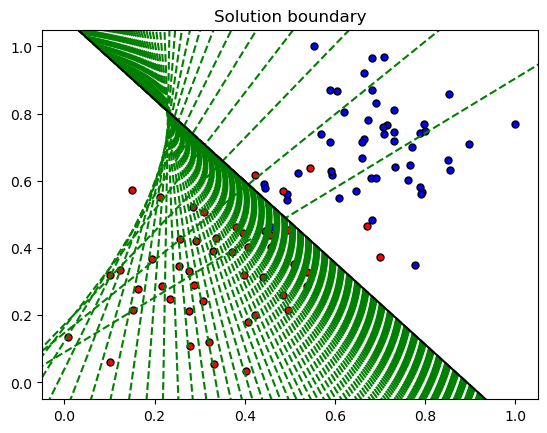

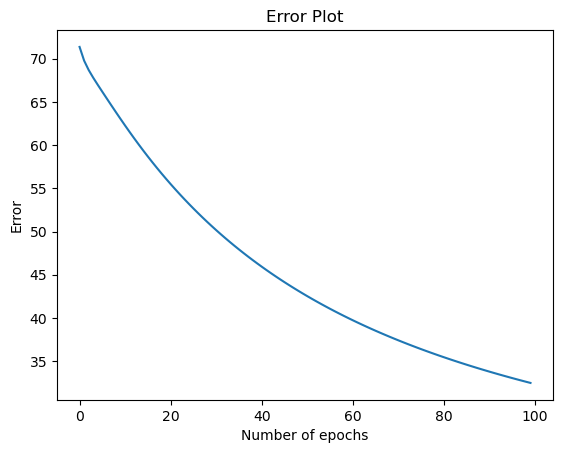

In [74]:
train(X, y, epochs, learnrate, True)

# Problem 6: Predicting Student Admissions with Neural Networks
In this notebook, we predict student admissions to graduate school at UCLA based on three pieces of data:
- GRE Scores (Test)
- GPA Scores (Grades)
- Class rank (1-4)

The dataset originally came from here: http://www.ats.ucla.edu/

## Loading the data
To load the data and format it nicely, we will use two very useful packages called Pandas and Numpy. You can read on the documentation here:
- https://pandas.pydata.org/pandas-docs/stable/
- https://docs.scipy.org/

In [75]:
# Importing pandas and numpy
import pandas as pd
import numpy as np

# Reading the csv file into a pandas DataFrame
data = pd.read_csv('uclastudent_data.csv')

# Printing out the first 10 rows of our data
data[:10]

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4
5,1,760,3.00,2
6,1,560,2.98,1
7,0,400,3.08,2
8,1,540,3.39,3
9,0,700,3.92,2


## Plotting the data

First let's make a plot of our data to see how it looks. In order to have a 2D plot, let's ingore the rank.

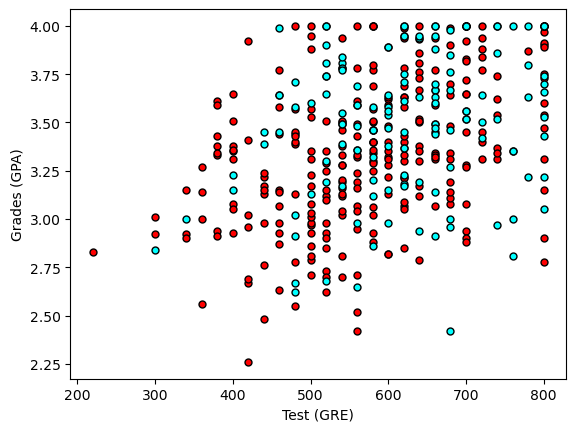

In [76]:
# Importing matplotlib
import matplotlib.pyplot as plt

# Function to help us plot
def plot_points(data):
    X = np.array(data[["gre","gpa"]])
    y = np.array(data["admit"])
    admitted = X[np.argwhere(y==1)]
    rejected = X[np.argwhere(y==0)]
    plt.scatter([s[0][0] for s in rejected], [s[0][1] for s in rejected], s = 25, color = 'red', edgecolor = 'k')
    plt.scatter([s[0][0] for s in admitted], [s[0][1] for s in admitted], s = 25, color = 'cyan', edgecolor = 'k')
    plt.xlabel('Test (GRE)')
    plt.ylabel('Grades (GPA)')
    
# Plotting the points
plot_points(data)
plt.show()

Roughly, it looks like the students with high scores in the grades and test passed, while the ones with low scores didn't, but the data is not as nicely separable as we hoped it would. Maybe it would help to take the rank into account? Let's make 4 plots, each one for each rank.

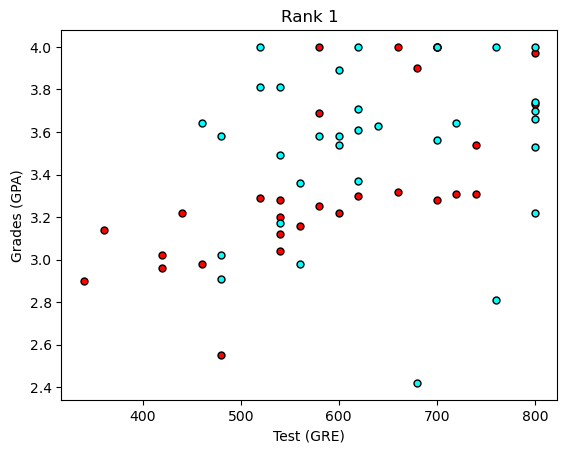

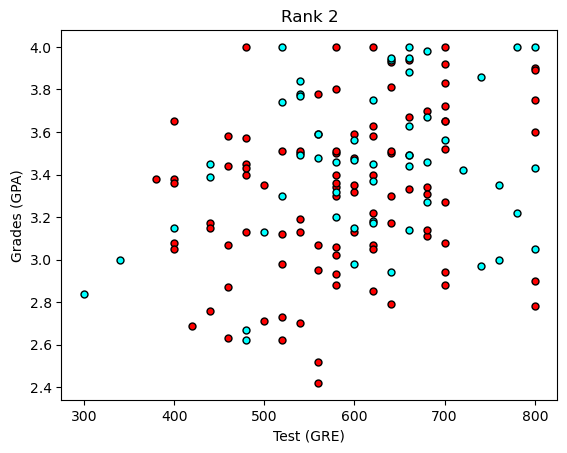

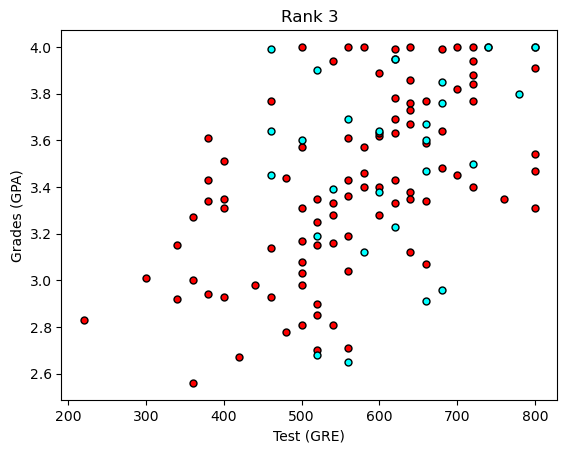

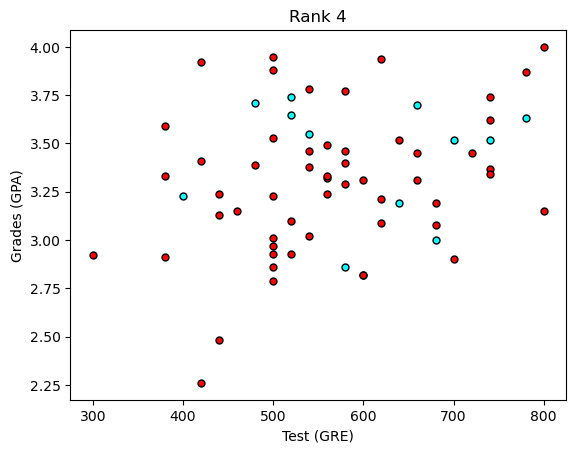

In [77]:
# Separating the ranks
data_rank1 = data[data["rank"]==1]
data_rank2 = data[data["rank"]==2]
data_rank3 = data[data["rank"]==3]
data_rank4 = data[data["rank"]==4]

# Plotting the graphs
plot_points(data_rank1)
plt.title("Rank 1")
plt.show()
plot_points(data_rank2)
plt.title("Rank 2")
plt.show()
plot_points(data_rank3)
plt.title("Rank 3")
plt.show()
plot_points(data_rank4)
plt.title("Rank 4")
plt.show()

This looks more promising, as it seems that the lower the rank, the higher the acceptance rate. Let's use the rank as one of our inputs. In order to do this, we should one-hot encode it.

##  $\color{red}{\text{TODO: One-hot encoding the rank}}$
Use the `get_dummies` function in Pandas in order to one-hot encode the data.

In [78]:
# TODO:  Make dummy variables for rank

#code here 
one_hot_data = pd.concat([data, pd.get_dummies(data['rank'], prefix='rank')],axis=1)

# Print the first 10 rows of our data
one_hot_data[:10]



,admit,gre,gpa,rank,rank_1,rank_2,rank_3,rank_4
0,0,380,3.61,3,False,False,True,False
1,1,660,3.67,3,False,False,True,False
2,1,800,4.00,1,True,False,False,False
3,1,640,3.19,4,False,False,False,True
4,0,520,2.93,4,False,False,False,True
5,1,760,3.00,2,False,True,False,False
6,1,560,2.98,1,True,False,False,False
7,0,400,3.08,2,False,True,False,False
8,1,540,3.39,3,False,False,True,False
9,0,700,3.92,2,False,True,False,False


## $\color{red}{\text{TODO: Scaling the data}}$
The next step is to scale the data. We notice that the range for grades is 1.0-4.0, whereas the range for test scores is roughly 200-800, which is much larger. This means our data is skewed, and that makes it hard for a neural network to handle. Let's fit our two features into a range of 0-1, by dividing the grades by 4.0, and the test score by 800.

In [80]:
# Making a copy of our data
processed_data = one_hot_data[:]

# TODO: Scale the columns
# code here
# processed_data.head()
processed_data['gpa'] = processed_data['gpa']/4.0
processed_data['gre'] = processed_data['gre']/800



# Printing the first 10 rows of our procesed data
processed_data[:10]

,admit,gre,gpa,rank,rank_1,rank_2,rank_3,rank_4
0,0,0.475,0.9025,3,False,False,True,False
1,1,0.825,0.9175,3,False,False,True,False
2,1,1.000,1.0000,1,True,False,False,False
3,1,0.800,0.7975,4,False,False,False,True
4,0,0.650,0.7325,4,False,False,False,True
5,1,0.950,0.7500,2,False,True,False,False
6,1,0.700,0.7450,1,True,False,False,False
7,0,0.500,0.7700,2,False,True,False,False
8,1,0.675,0.8475,3,False,False,True,False
9,0,0.875,0.9800,2,False,True,False,False


## Splitting the data into Training and Testing

In order to test our algorithm, we'll split the data into a Training and a Testing set. The size of the testing set will be 10% of the total data.

In [82]:
sample = np.random.choice(processed_data.index, size=int(len(processed_data)*0.9), replace=False)
train_data, test_data = processed_data.iloc[sample], processed_data.drop(sample)

print("Number of training samples is", len(train_data))
print("Number of testing samples is", len(test_data))
print(train_data[:10])
print(test_data[:10])

Number of training samples is 360
Number of testing samples is 40
     admit    gre     gpa  rank  rank_1  rank_2  rank_3  rank_4
263      1  0.775  0.9875     3   False   False    True   False
304      0  0.275  0.7075     3   False   False    True   False
172      0  0.850  0.8700     3   False   False    True   False
379      0  0.675  0.6750     2   False    True   False   False
290      1  0.775  0.8625     2   False    True   False   False
261      0  0.550  0.7875     2   False    True   False   False
186      0  0.700  0.9025     3   False   False    True   False
274      0  0.650  0.7800     2   False    True   False   False
43       0  0.625  0.8275     3   False   False    True   False
7        0  0.500  0.7700     2   False    True   False   False
    admit    gre     gpa  rank  rank_1  rank_2  rank_3  rank_4
1       1  0.825  0.9175     3   False   False    True   False
14      1  0.875  1.0000     1    True   False   False   False
18      0  1.000  0.9375     2   False   

## Splitting the data into features and targets (labels)
Now, as a final step before the training, we'll split the data into features (X) and targets (y).

In [83]:
features = train_data.drop('admit', axis=1)
targets = train_data['admit']
features_test = test_data.drop('admit', axis=1)
targets_test = test_data['admit']

print(features[:10])
print(targets[:10])

       gre     gpa  rank  rank_1  rank_2  rank_3  rank_4
263  0.775  0.9875     3   False   False    True   False
304  0.275  0.7075     3   False   False    True   False
172  0.850  0.8700     3   False   False    True   False
379  0.675  0.6750     2   False    True   False   False
290  0.775  0.8625     2   False    True   False   False
261  0.550  0.7875     2   False    True   False   False
186  0.700  0.9025     3   False   False    True   False
274  0.650  0.7800     2   False    True   False   False
43   0.625  0.8275     3   False   False    True   False
7    0.500  0.7700     2   False    True   False   False
263    1
304    0
172    0
379    0
290    1
261    0
186    0
274    0
43     0
7      0
Name: admit, dtype: int64


## Training the 2-layer Neural Network
The following function trains the 2-layer neural network. First, we'll write some helper functions.

In [84]:
# Activation (sigmoid) function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
def sigmoid_prime(x):
    return sigmoid(x) * (1-sigmoid(x))
def error_formula(y, output):
    return - y*np.log(output) - (1 - y) * np.log(1-output)

# $\color{red}{\text{TODO: Backpropagate the error}}$
Write the error term. Remember that this is given by the equation $$ (y-\hat{y}) \sigma'(x) $$

In [89]:
# TODO: Write the error term formula
# replace none with code

def error_term_formula(x, y, output):
    return (y-output)
    # return np.dot((y-output),sigmoid(x))

In [90]:
# Neural Network hyperparameters
epochs = 1000
learnrate = 0.5

# Training function
def train_nn(features, targets, epochs, learnrate):
    
    # Use to same seed to make debugging easier
    np.random.seed(42)

    n_records, n_features = features.shape
    last_loss = None

    # Initialize weights
    weights = np.random.normal(scale=1 / n_features**.5, size=n_features)

    for e in range(epochs):
        del_w = np.zeros(weights.shape)
        for x, y in zip(features.values, targets):
            # Loop through all records, x is the input, y is the target

            # Activation of the output unit
            #   Notice we multiply the inputs and the weights here 
            #   rather than storing h as a separate variable 
            output = sigmoid(np.dot(x, weights))

            # The error, the target minus the network output
            error = error_formula(y, output)

            # The error term
            error_term = error_term_formula(x, y, output)

            # The gradient descent step, the error times the gradient times the inputs
            del_w += error_term * x

        # Update the weights here. The learning rate times the 
        # change in weights, divided by the number of records to average
        weights += learnrate * del_w / n_records

        # Printing out the mean square error on the training set
        if e % (epochs / 10) == 0:
            out = sigmoid(np.dot(features, weights))
            loss = np.mean((out - targets) ** 2)
            print("Epoch:", e)
            if last_loss and last_loss < loss:
                print("Train loss: ", loss, "  WARNING - Loss Increasing")
            else:
                print("Train loss: ", loss)
            last_loss = loss
            print("=========")
    print("Finished training!")
    return weights
    
weights = train_nn(features, targets, epochs, learnrate)

UFuncTypeError: Cannot cast ufunc 'add' output from dtype('O') to dtype('float64') with casting rule 'same_kind'

## Calculating the Accuracy on the Test Data

In [91]:
# Calculate accuracy on test data
test_out = sigmoid(np.dot(features_test, weights))
predictions = test_out > 0.5
accuracy = np.mean(predictions == targets_test)
print("Prediction accuracy: {:.3f}".format(accuracy))

NameError: name 'weights' is not defined

# Problem 7 : Perceptron Algorithm

To implement the perceptron algorithm to separate the following data (given in the file perceptrondata.csv).


Recall that the perceptron step works as follows. For a point with coordinates (p,q) label y, and prediction given by the equation 

$$\hat{y} = step(w_1x_1 + w_2x_2 + b)$$ 

- If the point is correctly classified, do nothing.
- If the point is classified positive, but it has a negative label, subtract $\alpha$ p, $\alpha$ q, and $\alpha$ from $w_1$, $w_2$, and $b$ respectively.
- If the point is classified negative, but it has a positive label, add $\alpha$ p, $\alpha$ q, and $\alpha$ from $w_1$, $w_2$, and $b$ respectively.

First, we'll start with some functions that will help us plot and visualize the data.

In [92]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#Some helper functions for plotting and drawing lines

def plot_points(X, y):
    admitted = X[np.argwhere(y==1)]
    rejected = X[np.argwhere(y==0)]
    plt.scatter([s[0][0] for s in rejected], [s[0][1] for s in rejected], s = 25, color = 'blue', edgecolor = 'k')
    plt.scatter([s[0][0] for s in admitted], [s[0][1] for s in admitted], s = 25, color = 'red', edgecolor = 'k')

def display(xmin, xmax, ymin, ymax, m, b, color='g--'):
    plt.xlim(xmin,xmax)
    plt.ylim(ymin,ymax)
    x = np.arange(-10, 10, 0.1)
    plt.plot(x, m*x+b, color)

## Reading and plotting the data

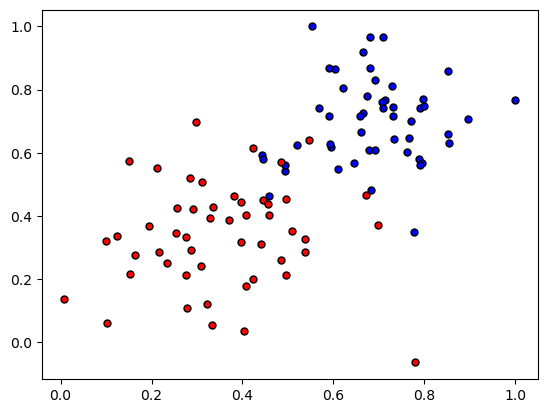

In [93]:
data = pd.read_csv('perceptrondata.csv', header=None)
X = np.array(data[[0,1]])
y = np.array(data[2])
plot_points(X,y)
plt.show()

# $\color{red}{\text{TODO: Fill in the code below}}$
# $\color{red}{\text{(for perceptronStep only) to implement the perceptron trick.}}$
### The function should receive as inputs the data X, the labels y, the weights W (as an array), and the bias b, update the weights and bias W, b, according to the perceptron algorithm, and return W and b.

In [96]:
import numpy as np
# Setting the random seed, feel free to change it and see different solutions.
np.random.seed(42)

def stepFunction(t):
    if t >= 0:
        return 1
    return 0

def prediction(X, W, b):
    return stepFunction((np.matmul(X,W)+b)[0])

# TODO: Fill in the code below to implement the perceptron trick.
# The function should receive as inputs the data X, the labels y,
# the weights W (as an array), and the bias b,
# update the weights and bias W, b, according to the perceptron algorithm,
# and return W and b.

def perceptronStep(X, y, W, b, learn_rate = 0.01):
    # Fill in code, replace none

    for index in range(len(X)):
        x1 = X[index][0]
        x2 = X[index][1]
        label = 1.0 if x1 * W[0] + x2 * W[1] + b > 0 else 0.0
        if label > y[index]:
            # subtract αp, αq, and α from w1, w2, and b respectively
            W[0] -= x1 * learn_rate
            W[1] -= x2 * learn_rate
            b -= learn_rate
        elif label < y[index]:
            # add αp, αq, and α from w1,w2, and b respectively
            W[0] += x1 * learn_rate
            W[1] += x2 * learn_rate
            b += learn_rate
    return W, b
    
    # return none

# This function runs the perceptron algorithm repeatedly on the dataset,
# and returns a few of the boundary lines obtained in the iterations,
# for plotting purposes.
# Feel free to play with the learning rate and the num_epochs,
# and see your results plotted below.
def trainPerceptronAlgorithm(X, y, learn_rate = 0.01, num_epochs = 25):
    x_min, x_max = min(X.T[0]), max(X.T[0])
    y_min, y_max = min(X.T[1]), max(X.T[1])
    W = np.array(np.random.rand(2,1))
    b = np.random.rand(1)[0] + x_max
    # These are the solution lines that get plotted below.
    boundary_lines = []
    for i in range(num_epochs):
        # In each epoch, we apply the perceptron step.
        W, b = perceptronStep(X, y, W, b, learn_rate)
        boundary_lines.append((-W[0]/W[1], -b/W[1]))
        display(x_min-0.5, x_max+0.5, y_min-0.5, y_max+0.5, -W[0]/W[1], -b/W[1])
        plot_points(X,y)
        
         
#   return boundary_lines

# Plotting the solution boundary
    plt.title("Solution boundary")
    display(x_min-0.5, x_max+0.5, y_min-0.5, y_max+0.5, -W[0]/W[1], -b/W[1], 'black')
    plt.show()

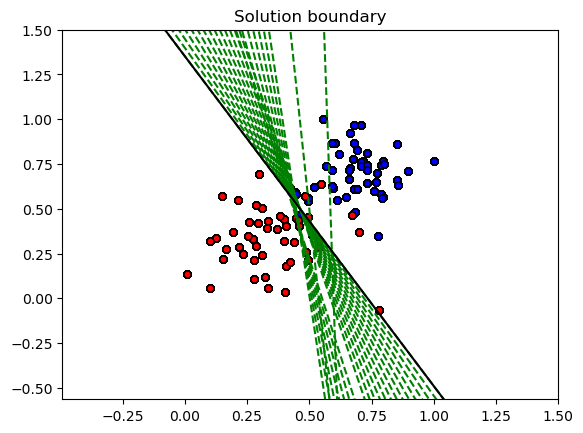

In [97]:
trainPerceptronAlgorithm(X, y)